<a href="https://colab.research.google.com/github/AgungDaffa/pcvk/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 2

1. Brilliyand Noval Herdana Putra (2141720104)
2. Agung Afrizal Daffa (2141720110)
3. Muhammad Islahuddin (2141720268)

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
 - Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
 - Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.


In [1]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import os

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
img_m = cv.imread('/content/drive/MyDrive/gambar/Looknam.jpg')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

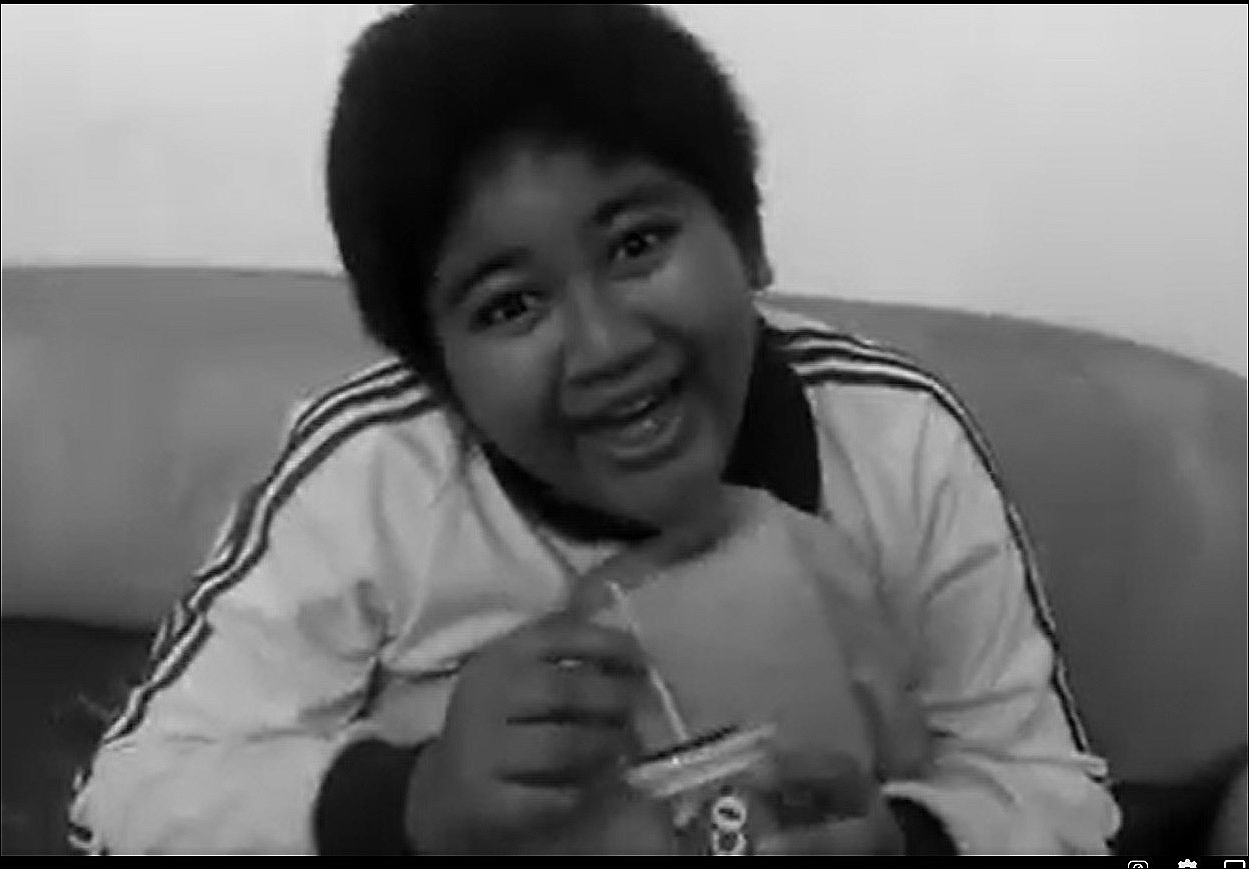

In [5]:

#Sharpen

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

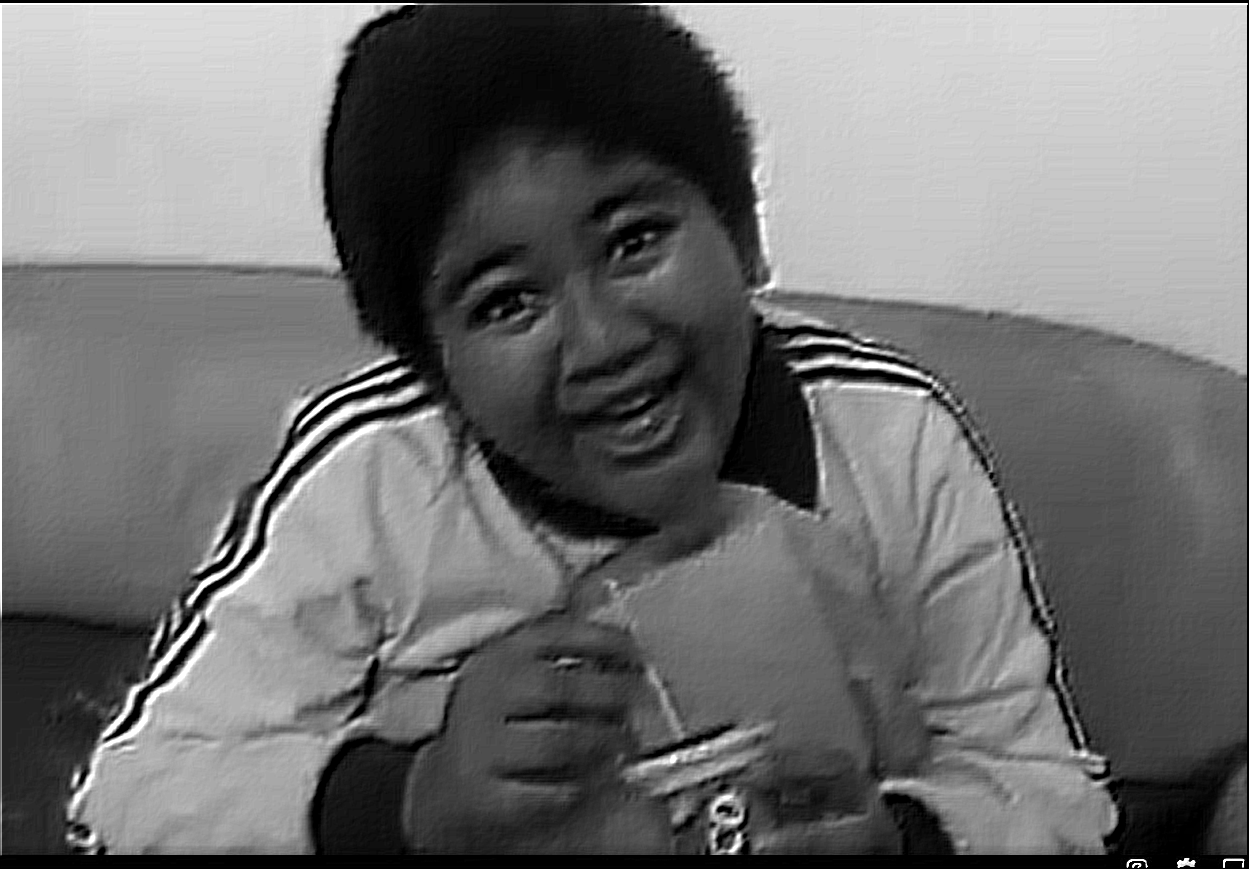

In [6]:
#Emboss

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

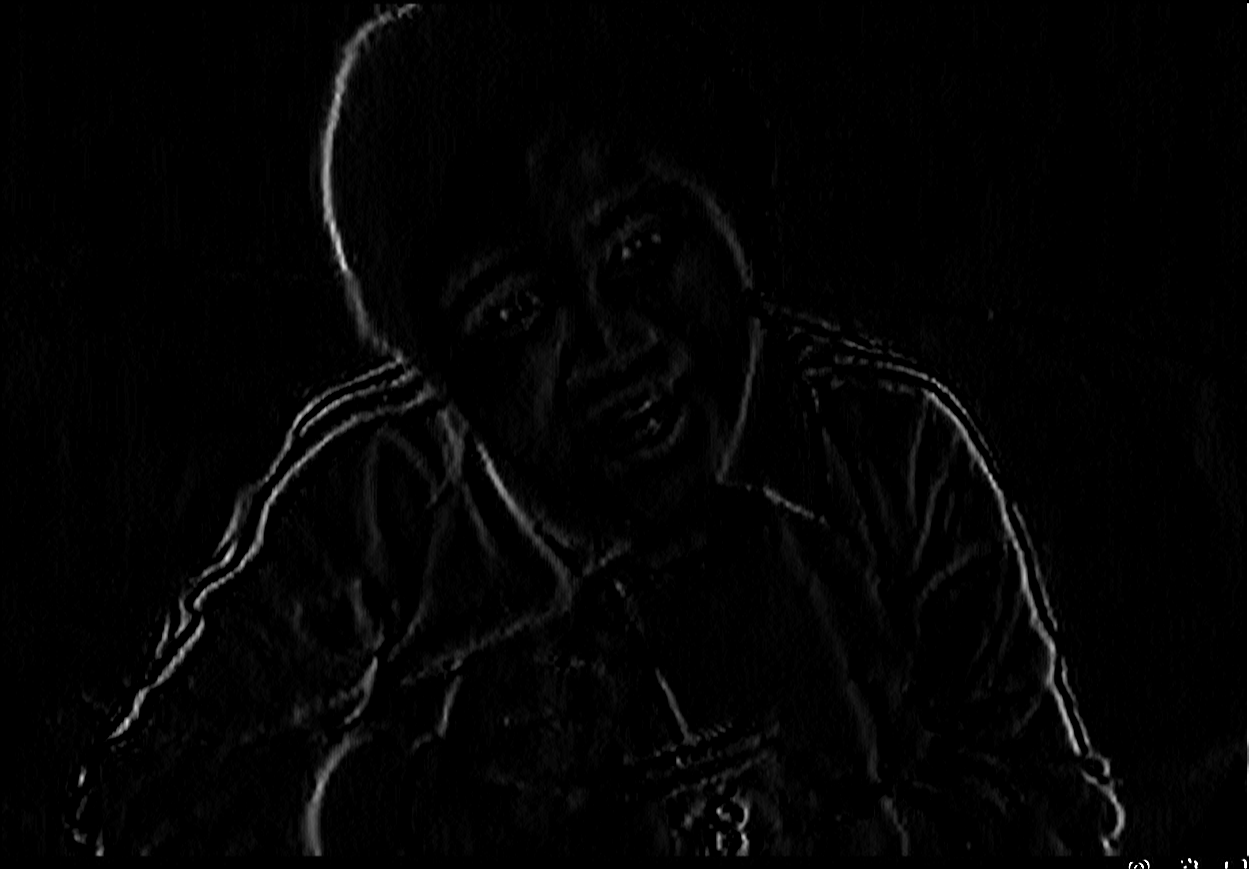

In [7]:
#Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

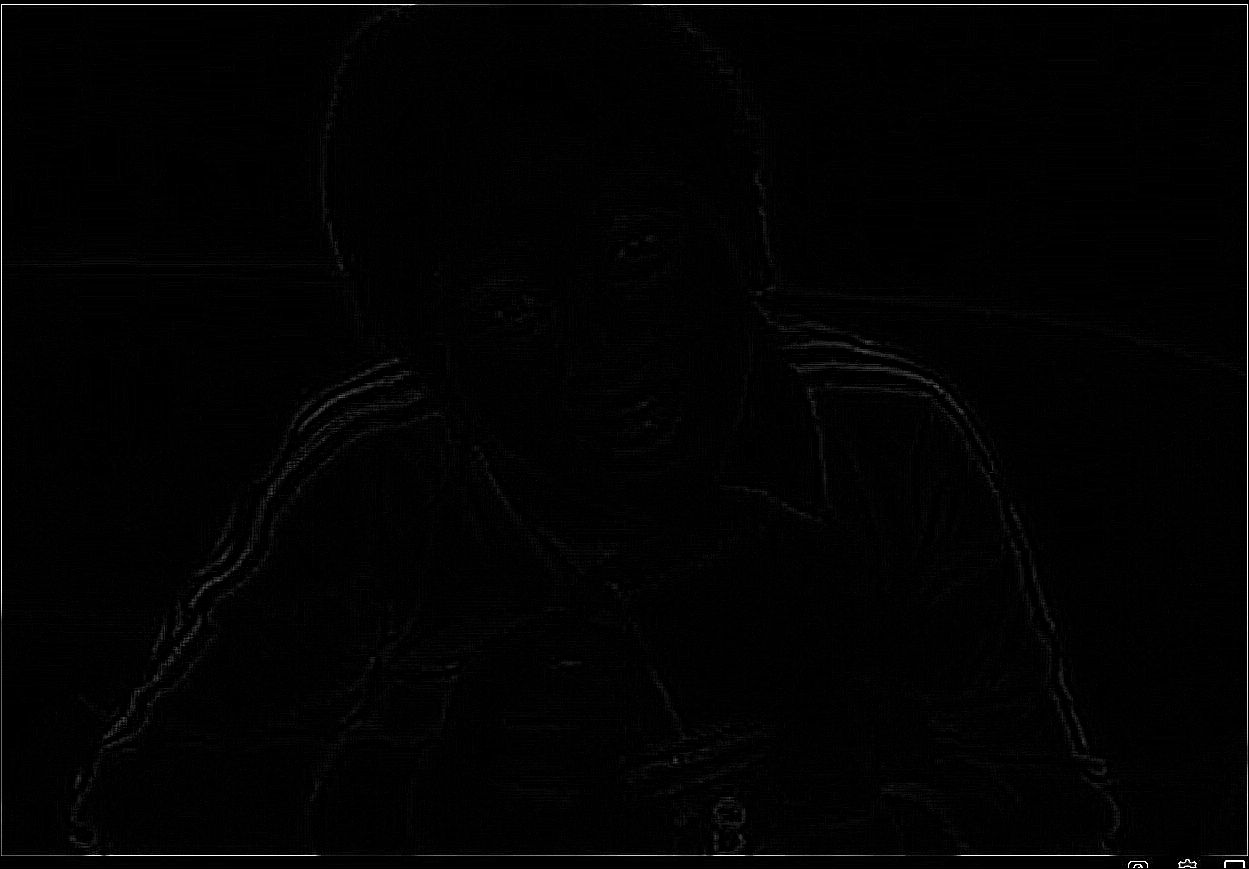

In [8]:

#Canny Edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

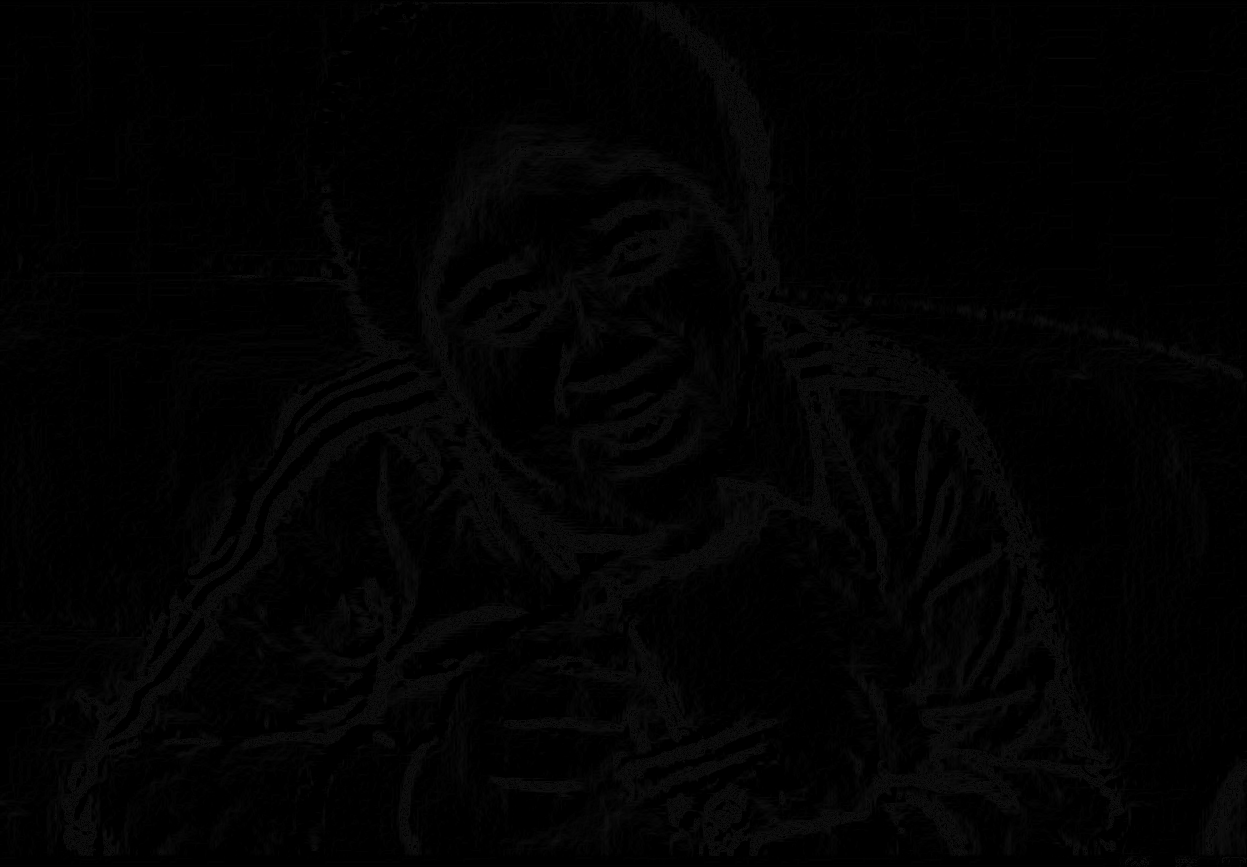

In [9]:
#Prewitt Edge Detection

kernel_prewitt_vertical = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

kernel_prewitt_horizontal = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

result_vertical = cv.filter2D(img_gray, -1, kernel_prewitt_vertical)
result_horizontal = cv.filter2D(img_gray, -1, kernel_prewitt_horizontal)
result_combined = np.sqrt(result_vertical**2 + result_horizontal**2).astype(np.uint8)

cv2_imshow(result_combined)

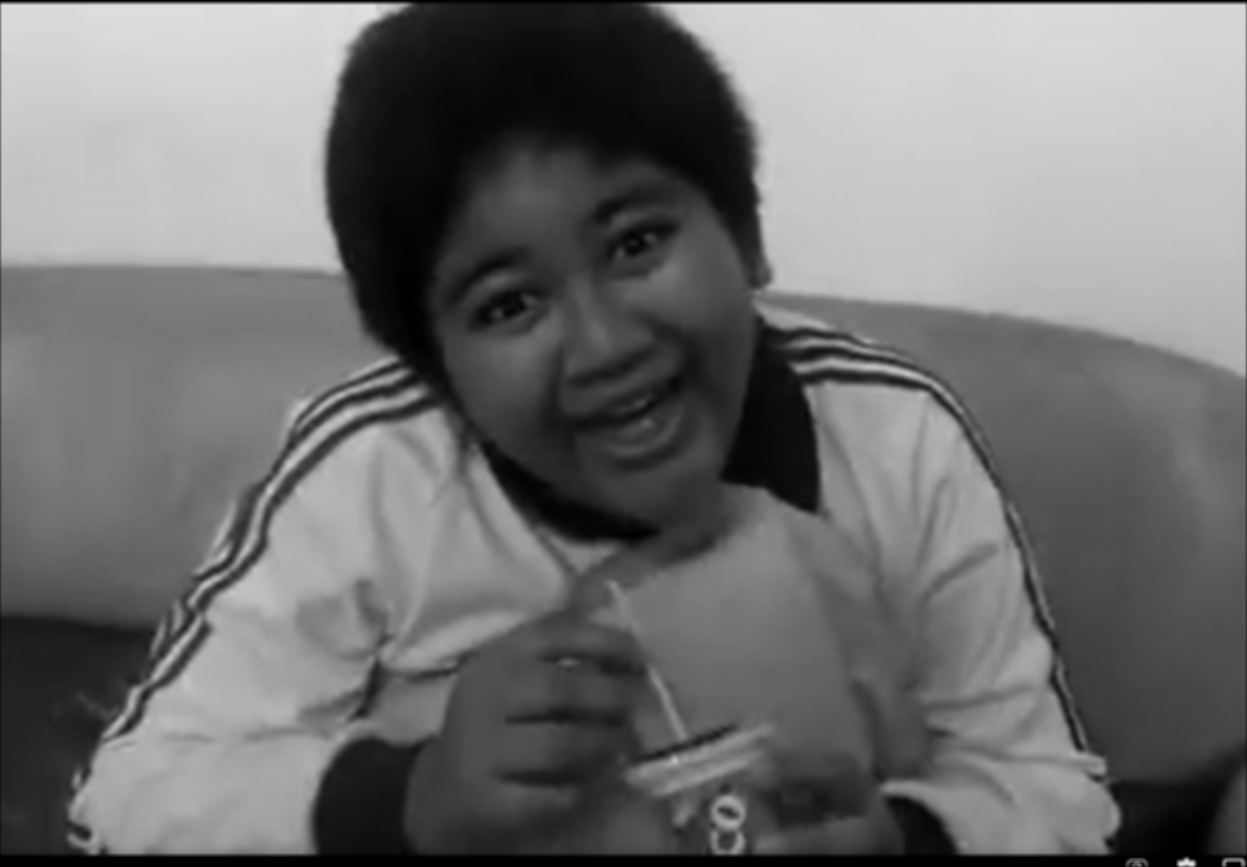

In [10]:

#5x5 Gaussian Blur

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

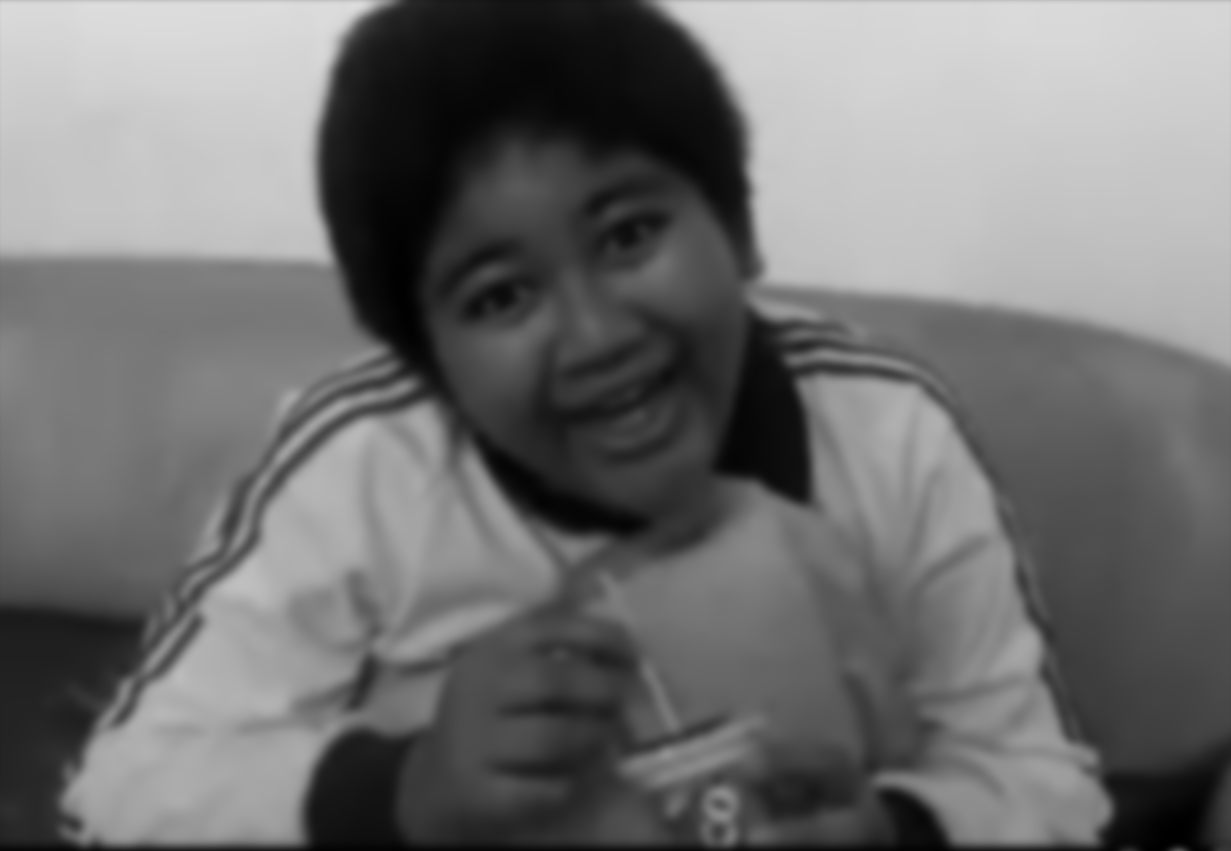

In [11]:
#21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

### **TUGAS**

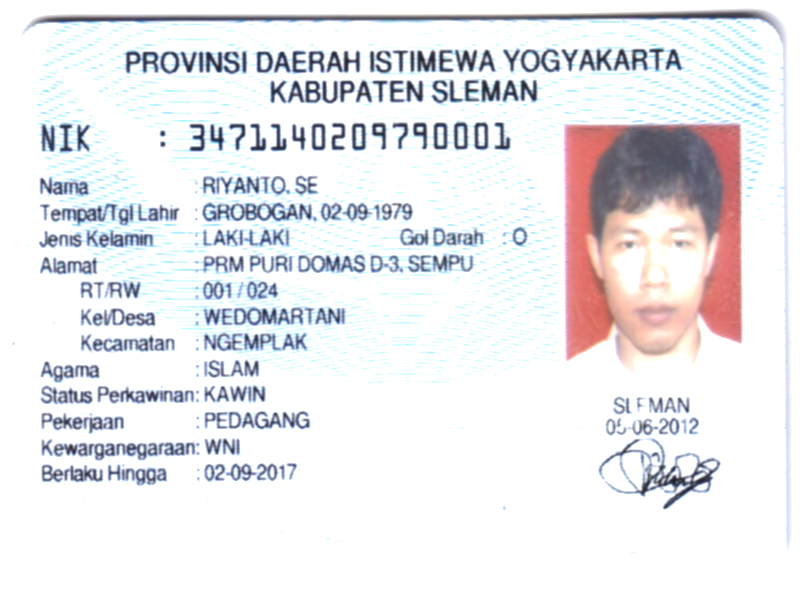

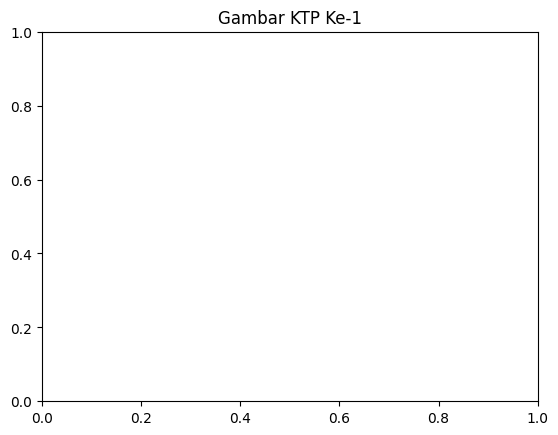

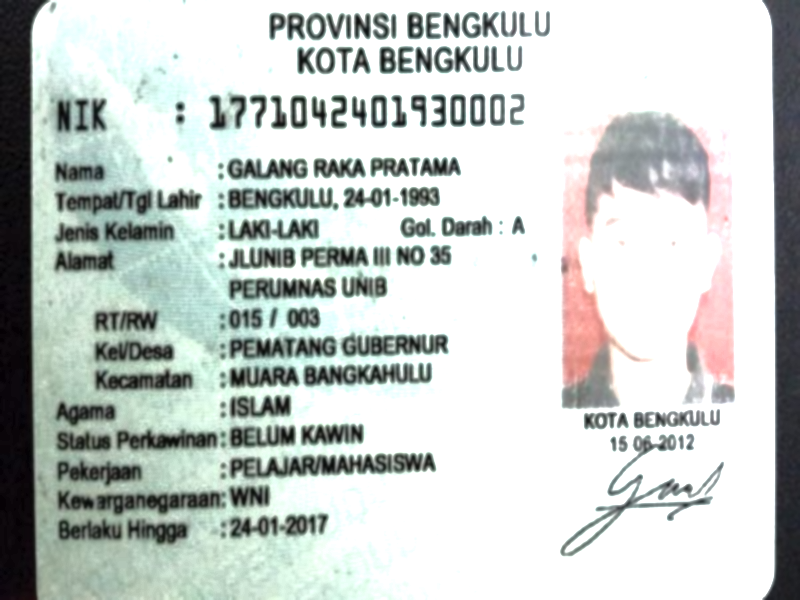

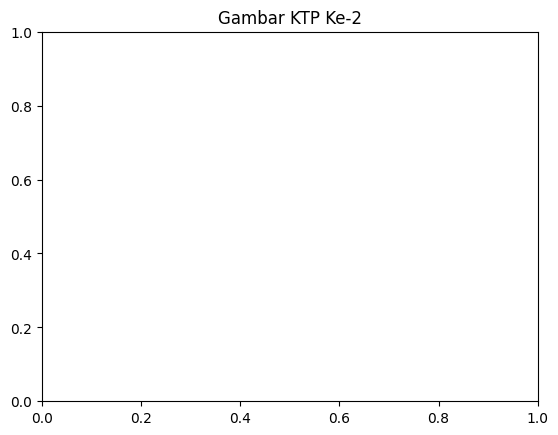

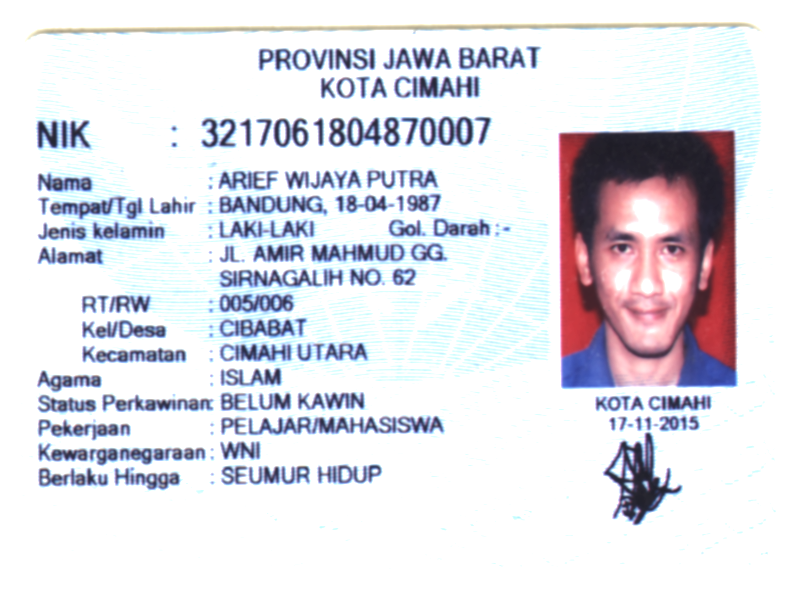

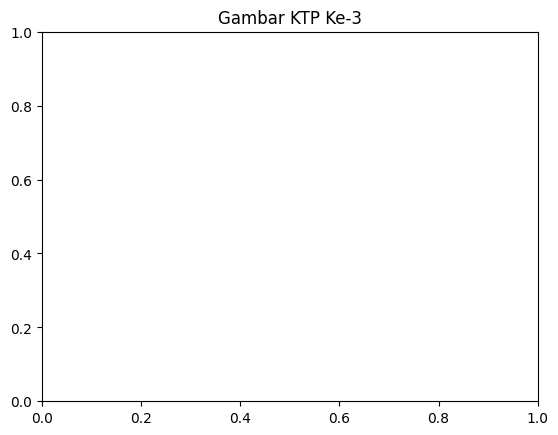

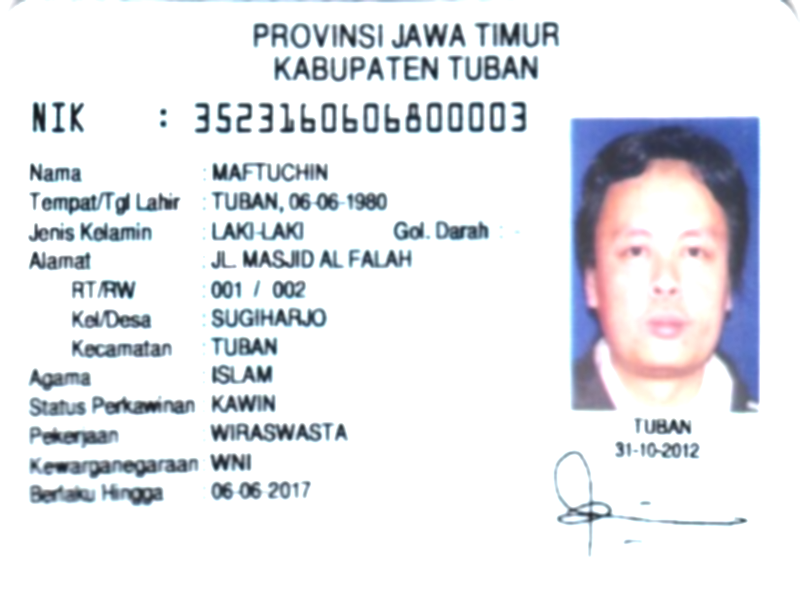

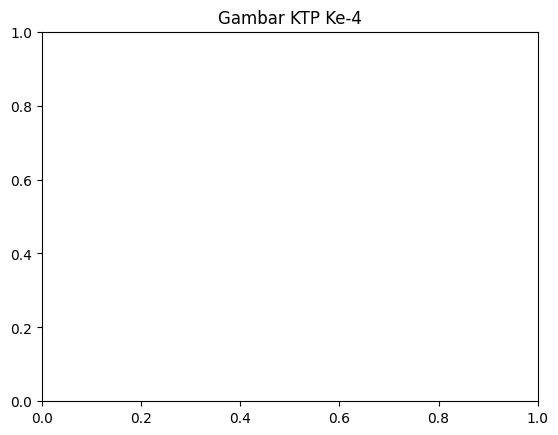

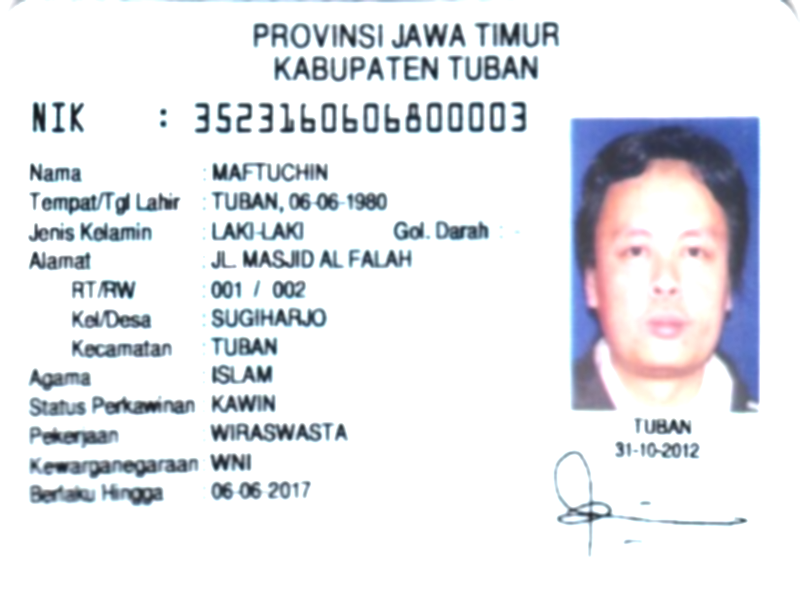

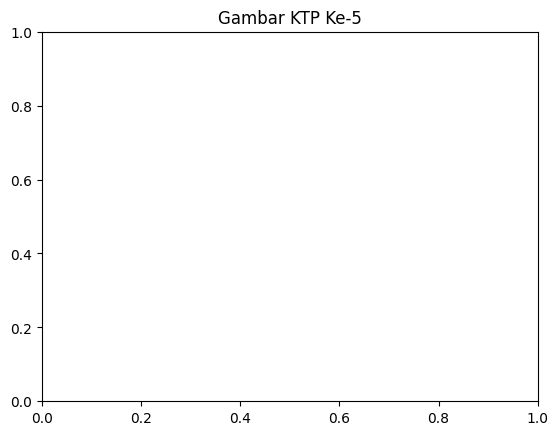

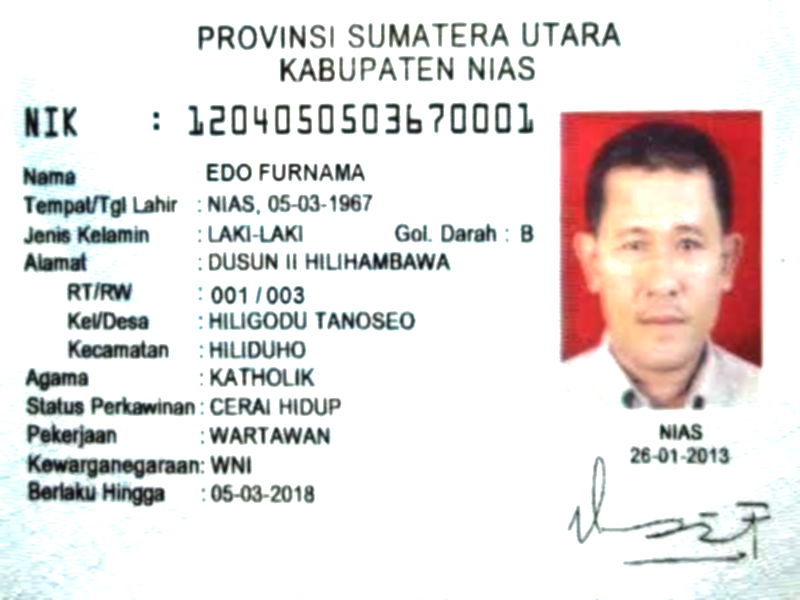

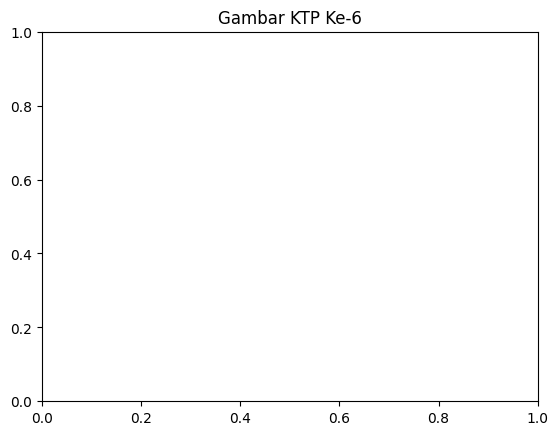

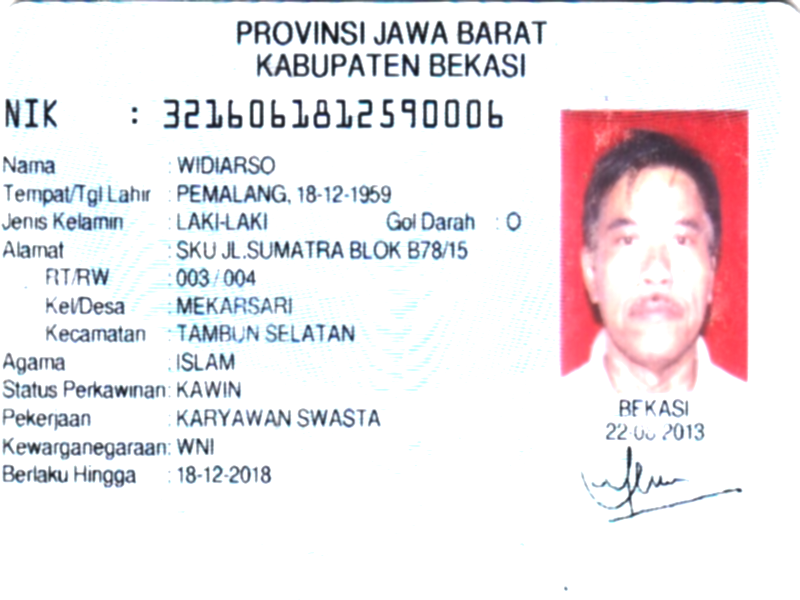

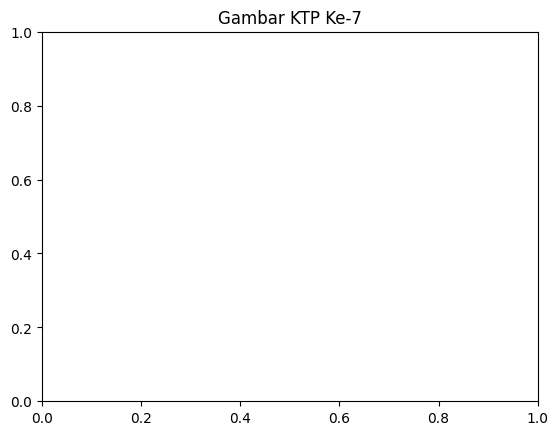

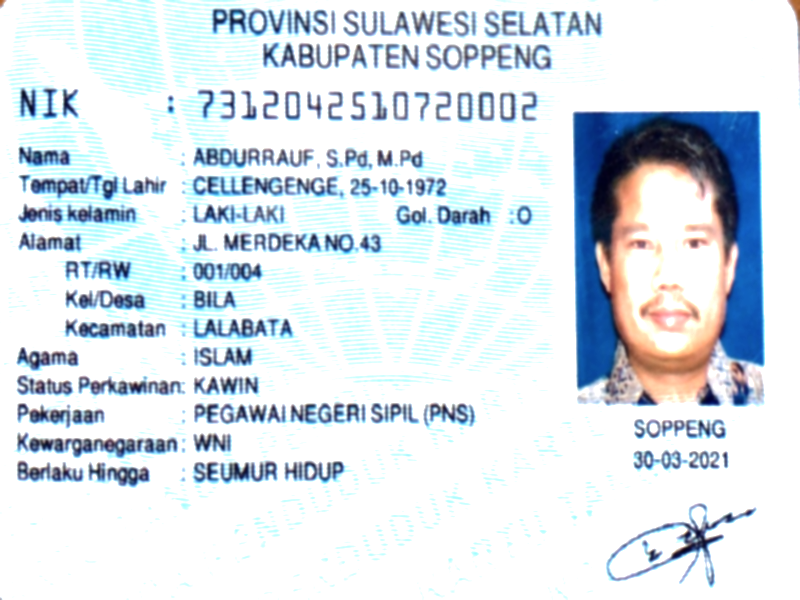

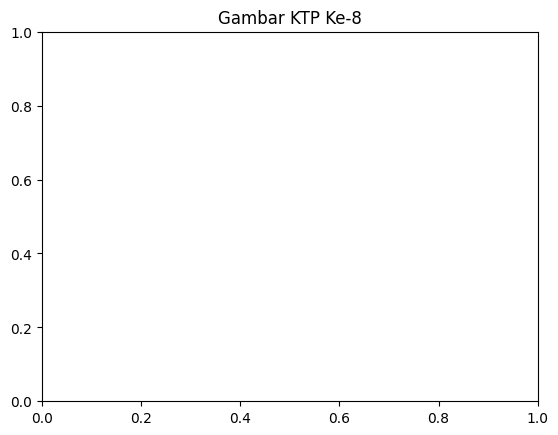

In [17]:
# Baca gambar-gambar KTP
image_paths = [
    '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp.png', '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp1.png',
    '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp2.png', '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp3.png',
    '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp4.png', '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp5.png',
    '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/ktp6.png', '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More/KTP7.jpeg'
]


# Proses semua gambar
processed_images = []
for path in image_paths:
    img = cv.imread(path)

    # Resize gambar
    resized_img = cv.resize(img, (800, 600))

    # Terapkan filterisasi (contoh: filter Gaussian)
    filtered_img = cv.GaussianBlur(resized_img, (5, 5), 0)

    # Terapkan equalisasi histogram
    gray_img = cv.cvtColor(filtered_img, cv.COLOR_BGR2GRAY)
    equalized_img = cv.equalizeHist(gray_img)
    equalized_img = cv.cvtColor(equalized_img, cv.COLOR_GRAY2BGR)

    # Operasi Aritmatika (contoh: penjumlahan)
    result_img = cv.add(filtered_img, equalized_img)

    processed_images.append(result_img)

# Tampilkan hasil perbaikan citra
for idx, img in enumerate(processed_images):
    description = f'Gambar KTP Ke-{idx + 1}'
    cv2_imshow(img)
    plt.title(description)
    plt.show()

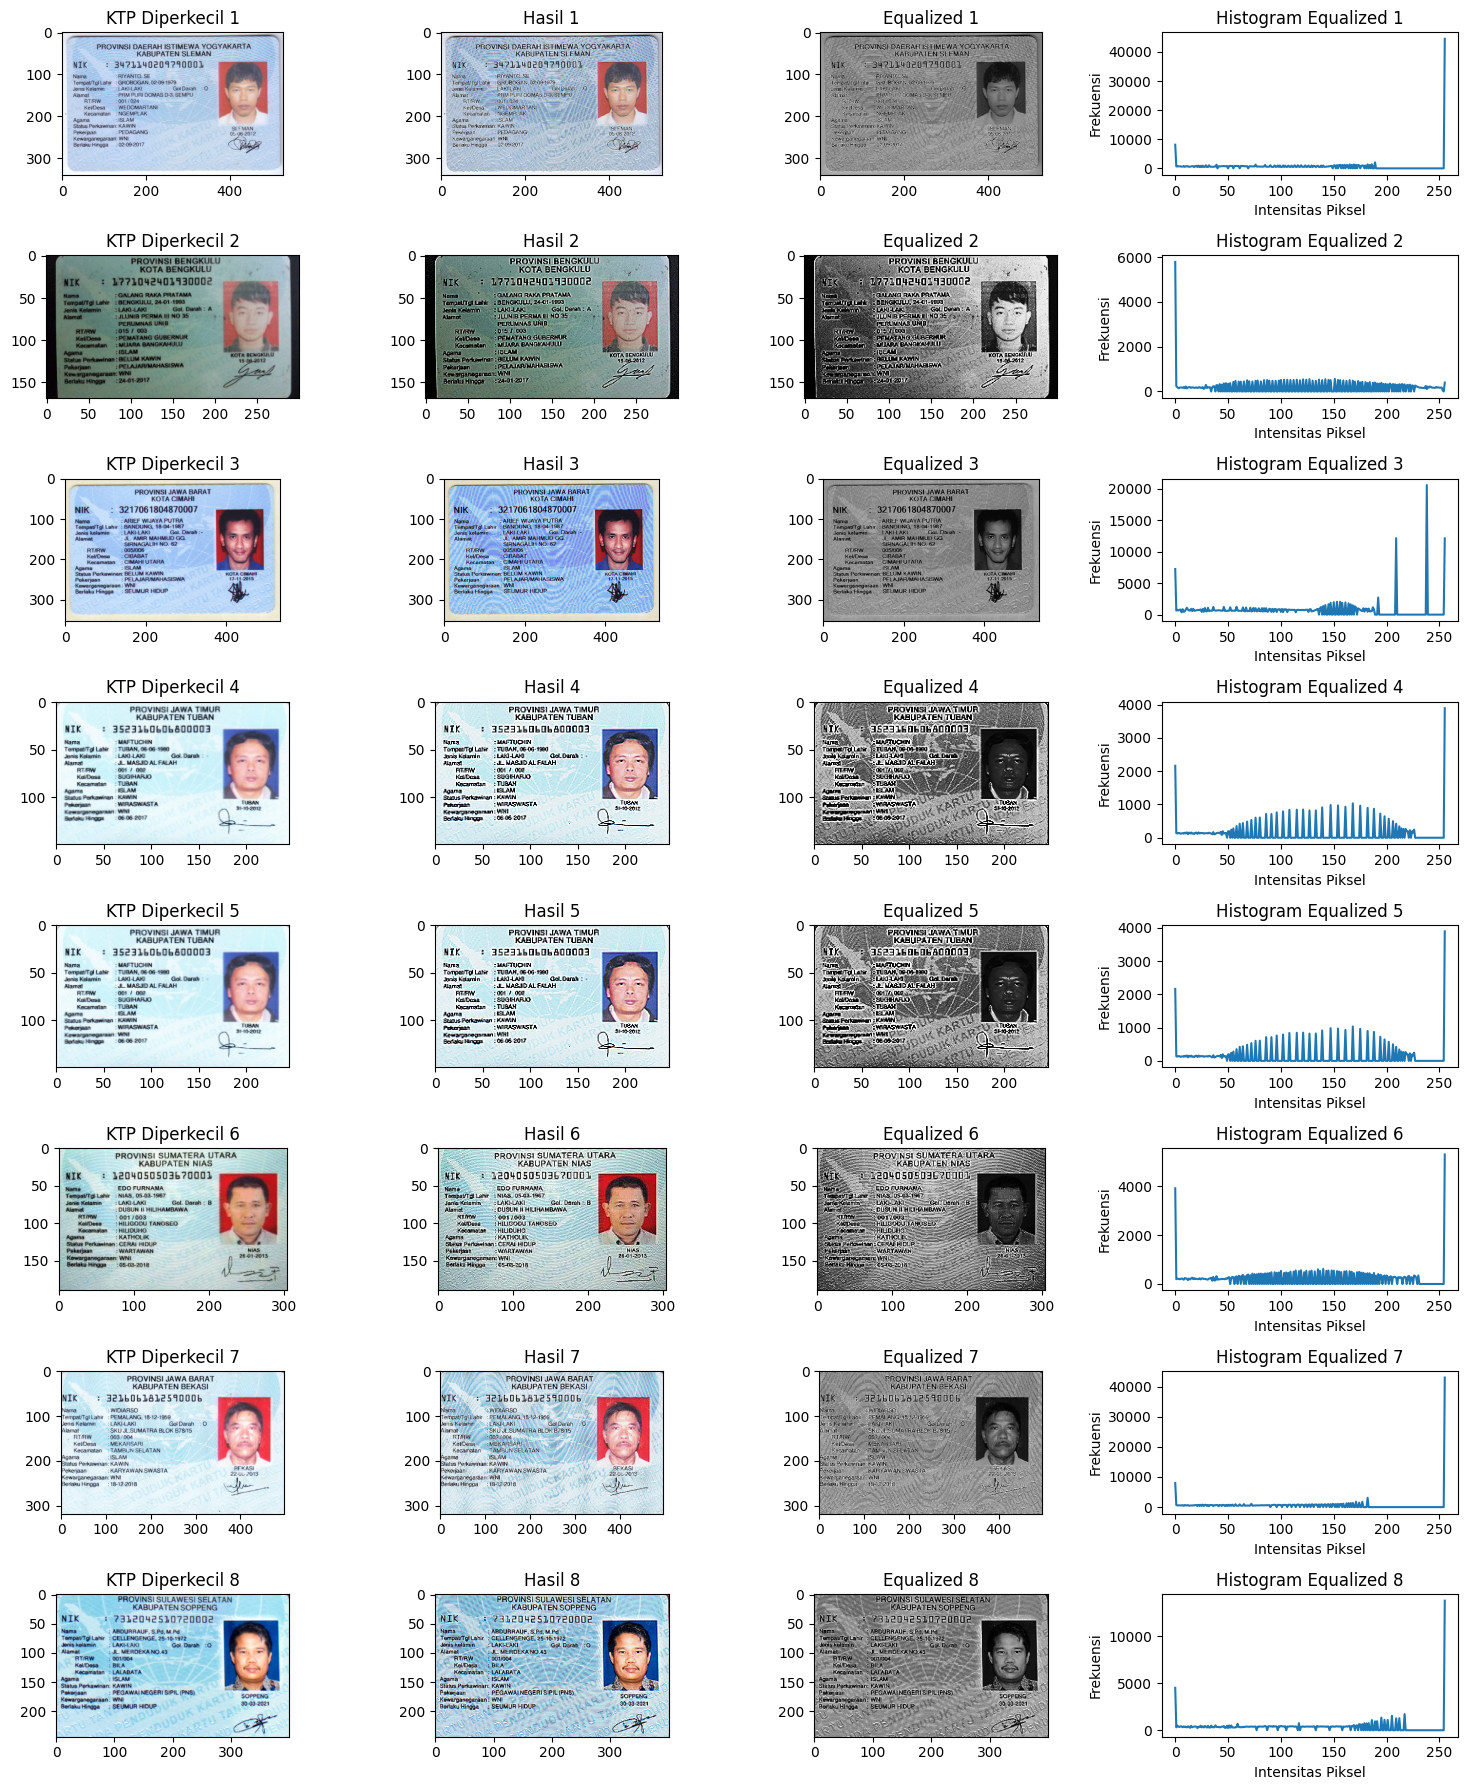

In [20]:
# Tentukan path folder
folder_path = '/content/drive/MyDrive/gambar/Dataset KTP/KTP_More'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
    result_equalized = cv.equalizeHist(result_gray)
    result_equalized_color = cv.cvtColor(result_equalized, cv.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(result_equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()